# Building MicroGrad from scratch

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Core value  object of micrograd and it visualization

In [2]:
class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        out= Value(self.data + other.data,(self,other),'+')
        #(self,other) is _children
        return out
    
    def __mul__(self,other):
        out= Value(self.data*other.data, (self,other),'*')
        #(self,other) is _children
        return out
    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child
        return out
        
        
    
    

a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
e=a*b; e.label="e"
d=e+c ;d.label="d"
f=Value(-2.0,label='f')
L=d*f ; L.label="L"
L

Value(data=-8.0)

**grad**

take note that ``self.grad`` is the derivative of a function that has more than one input variable (exp:dL/df).

The gradient simply measures the change in all weights with regard to the change in error.


-------------------------------------------------------------------------------
``set()``
Set items are **unordered**, **unchangeable**, and **do not allow duplicate values**.

**unordered** - items in a set do not have a defined order.

**unchangeable** - cannot change the items after the set has been created.

### Visualization

In [3]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
        for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


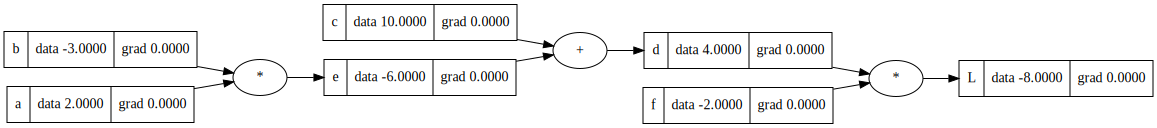

In [4]:
draw_dot(L)

## Manual Backpropagation example 1 (simple expression)

In [5]:

#Gradient Check
def lol():
    
    h=0.0001
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 + h ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to a becoz we bumped a little bit by h

6.000000000021544


In [6]:
#if we manually let L.grad=1
L.grad=1.0 

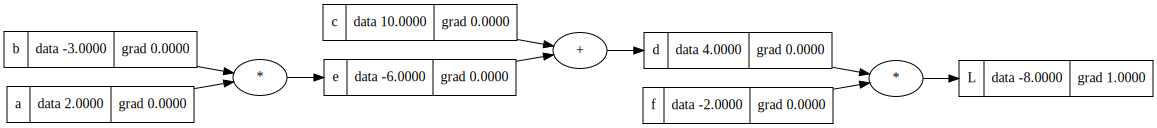

In [7]:
draw_dot(L)

Basically we have 

L=d*f

we would like to know

dL/dd= ?

it will be dL/dd= f


**definiton of derivative**

**(f(x+h)-f(x))/h**

**proof**
((d+h)*f - d*f)/h

=(d*f+h*f -d*f)/h

=h*f/h

= f




**L=d*f**

According to the visual above, we know that 

dL/df= d

then

f.grad =4.0 


dL/dd= f

then

d.grad=-2





 

In [8]:
f.grad =4.0 
d.grad=-2.0

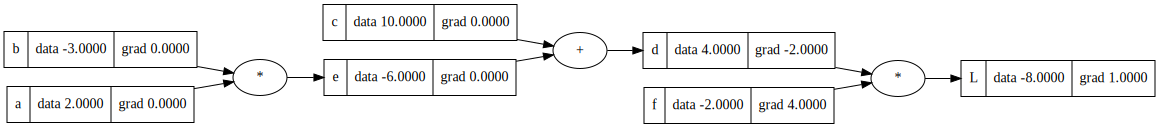

In [9]:
#the result will be
draw_dot(L)

In [10]:
#checking the answer f.grad is correct or not?

#Gradient Check
def lol():
    
    h=0.0001
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0 +h,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to f becoz we bumped a little bit by h

#it just f.grad or dL/df

3.9999999999995595


In [11]:
#checking the answer d.grad is correct or not?

#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    d.data+=h
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to d becoz we bumped a little bit by h

#it just d.grad or dL/dd

-1.9999999999953388


Next we need to derive **dL/dc**

dd/dc ?

d=c+e

dd/dc=1

**definiton of derivative**

**(f(x+h)-f(x))/h**

**Proof for dd/dc=1**
( ( (c+h)+e )-(c+e) )/h

=(c+h+e-c-e)/h

=h/h

=1

dd/de= 1 too.

-----------------------------------------------------------------------------

take note that dd/dc and dd/de are the infomation **how c and e impact d**, which are local gradient

and our **goal is to know how e and c impact L.**

To find **dL/dc** and **dL/de**, use **chain rule**

dL/dc= (dl/dd)*(dd/dc) = -2 *1= -2

dL/de=(dl/dd)*(dd/de)=-2 *1 = -2 


Hence 

c.grad=-2.0
e.grad = -2.0



In [12]:
c.grad=-2.0
e.grad = -2.0

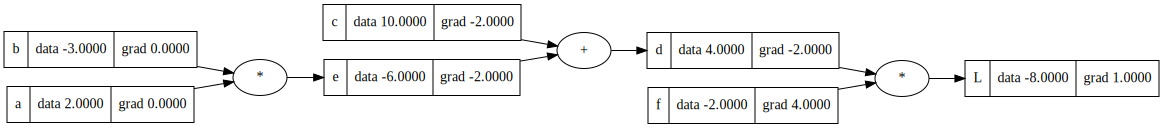

In [13]:
#the result will be
draw_dot(L)

In [14]:
#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    c.data+=h
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to c becoz we bumped a little bit by h

#it just c.grad or dL/dc

-1.9999999999953388


In [15]:
#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    e.data+=h
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to e becoz we bumped a little bit by h

#it just e.grad or dL/de

-1.9999999999953388


Next we need to derive **dL/da** and  **dL/db**

we known that

dL/de=-2.0

then 

dL/da=(dL/de)*(de/da)

dL/db=(dL/de)*(de/db)



We need To find local gradient which de/da

e=a*b

de/da=b = -3
de/db=a = 2

then

dL/da=(dL/de)*(de/da)= -2 * -3 = 6

dL/db=(dL/de)*(de/db)= -2 * 2 = -4

Hence

a.grad=6
b.grad=-4

In [16]:
a.grad=6.0
b.grad=-4.0

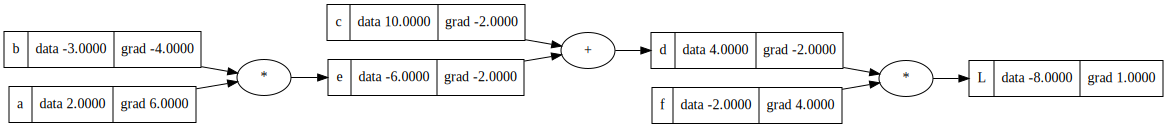

In [17]:
#the result will be
draw_dot(L)

In [18]:
#Gradient Check

def lol():
    
    h=0.001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    a.data+=h
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to a becoz we bumped a little bit by h

#it just a.grad or dL/da

6.000000000000227


In [19]:
#Gradient Check

def lol():
    
    h=0.001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    b.data+=h
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to b becoz we bumped a little bit by h

#it just b.grad or dL/db

-3.9999999999995595


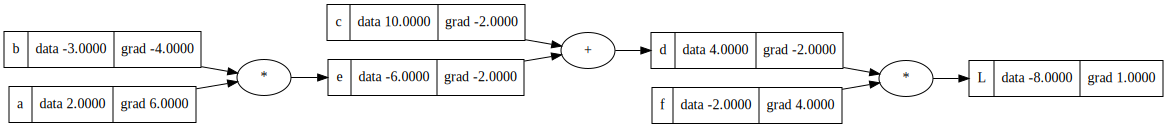

In [20]:
#the final result
draw_dot(L)

We **iterated through all of the nodes one by one, applying the chain rule locally**.

We can determine the **derivative of L with respect to the variables (a,b,c....,f)**. We have pointers to the children nodes and perform some operation on them to find output (the derivative of L with respect to the variables). These operations allow us to determine the local derivatives.

In fact, **the operations mean that we just go through and recursively multiply on the local derivative. It is just recursive application of chain rule backwards through the computation graph.**

##  Preview of single optimization step

If we want to increase L, we should increase the data in the direction of gradient by small step amount.

In [21]:
a.data += 0.01 * a.grad #step size
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


e=a*b; 
d=e+c 
L=d*f ; L.label="L"

print(L)

Value(data=-7.286496)


In the above example, we expect the value will be less negative.

It tell us that the gradient really give us some power because we know how to influence the final outcome.

It will be extremely useful for training knowledge.

 ## Manual backpropagation example 2 (a neuron)

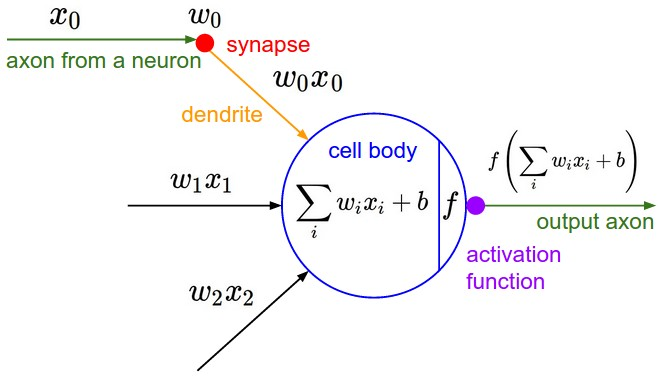

In [22]:
from IPython import display
display.Image("photo/neuron_model.jpeg")

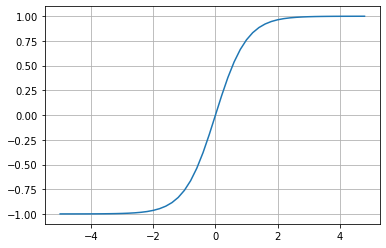

In [23]:
# example of activation function

plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

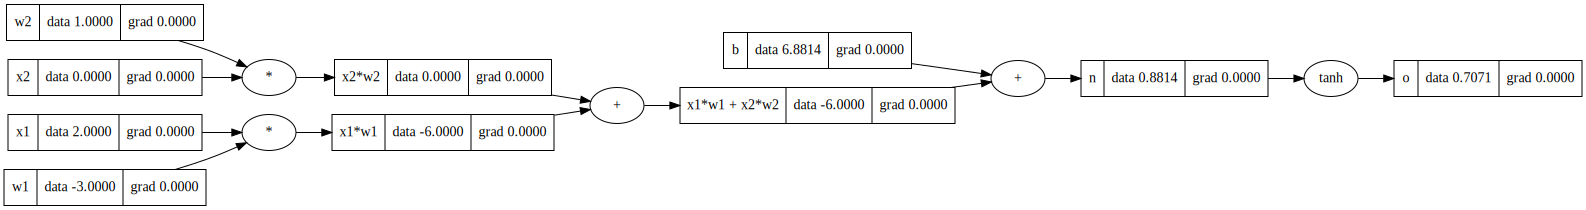

In [25]:
# inputs x1,x2
# 2d neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neurons w1,w2
#synaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh();o.label = 'o'
draw_dot(o)

Since we cannot make ``tanh`` out of just ``+`` and ``*``. This is becuase it is hyperbolic function exponentiation involve.

Then we will need to define **exponentiation function** in the ``class Value``

